In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
prices = pd.read_csv("stock.csv", parse_dates = ["Date"])

In [3]:
prices.head()

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,2014-05-27,87.982857,89.408569,87.947144,89.375717,80.948952,87216500
1,2014-05-28,89.431427,89.975716,89.111427,89.144287,80.739334,78870400
2,2014-05-29,89.692856,90.981430,89.681427,90.768570,82.210480,94118500
3,2014-05-30,91.139999,92.024284,89.842857,90.428574,81.902557,141005200
4,2014-06-02,90.565712,90.690002,88.928574,89.807144,81.339699,92337700


In [4]:
stock = pd.DataFrame()

In [5]:
stock["Date"] = prices["Date"]
stock["Apple"] = prices["Adj Close Price"]

In [6]:
# Dual Moving Avg crossover

In [7]:
stock.head()

,Date,Apple
0,2014-05-27,80.948952
1,2014-05-28,80.739334
2,2014-05-29,82.210480
3,2014-05-30,81.902557
4,2014-06-02,81.339699


In [8]:
# short term simple moving average
stock["SMA30"] = stock["Apple"].rolling(30).mean()

# long term moving average
stock["SMA100"] = stock["Apple"].rolling(100).mean()

In [9]:
stock.head(40)

,Date,Apple,SMA30,SMA100
0,2014-05-27,80.948952,NaN,NaN
1,2014-05-28,80.739334,NaN,NaN
2,2014-05-29,82.210480,NaN,NaN
3,2014-05-30,81.902557,NaN,NaN
4,2014-06-02,81.339699,NaN,NaN
5,2014-06-03,82.489952,NaN,NaN
6,2014-06-04,83.431915,NaN,NaN
7,2014-06-05,83.759270,NaN,NaN
8,2014-06-06,83.528938,NaN,NaN
9,2014-06-09,84.865509,NaN,NaN


In [10]:
stock["Apple"][:30].mean()
stock["Apple"][1:31].mean()

np.float64(83.55753913333332)

In [11]:
# for i, row in stock[:30].iterrows():
#     print(i, row["SMA30"])

In [12]:
def buy_sell(df):
    buy_signal_price = []
    sell_signal_price = []
    holding = [] # 1 for hold, 0 for not hold
    actions = [] # 0,1,-1
    sig = 0
    for i, row in df.iterrows():
        if row["SMA30"] > row["SMA100"]: # codition 1
            holding.append(1)
            if sig !=1: # flag
                buy_signal_price.append(row["Apple"])
                sell_signal_price.append(np.nan)
                sig = 1
                actions.append(1)
                
            else:
                buy_signal_price.append(np.nan)
                sell_signal_price.append(np.nan)
                actions.append(0)
                
        elif row["SMA30"] < row["SMA100"]: # codition 2
            holding.append(0) # not hold
            if sig !=-1: # flag
                buy_signal_price.append(np.nan)
                sell_signal_price.append(row["Apple"])
                sig = -1
                actions.append(-1)
            else:
                buy_signal_price.append(np.nan)
                sell_signal_price.append(np.nan)
                actions.append(0)
        else:
            holding.append(0)
            buy_signal_price.append(np.nan)
            sell_signal_price.append(np.nan)
            actions.append(0)
    
    return buy_signal_price,sell_signal_price, holding, actions

In [13]:
buysell = buy_sell(stock)

In [14]:
stock["Buy Price"] = buysell[0]
stock["Sell Price"] = buysell[1]
stock["Hold"] =  buysell[2]
stock["Actions"] = buysell[3]

In [15]:
pd.options.display.max_rows = None

In [16]:
stock

,Date,Apple,SMA30,SMA100,Buy Price,Sell Price,Hold,Actions
0,2014-05-27,80.948952,NaN,NaN,NaN,NaN,0,0
1,2014-05-28,80.739334,NaN,NaN,NaN,NaN,0,0
2,2014-05-29,82.210480,NaN,NaN,NaN,NaN,0,0
3,2014-05-30,81.902557,NaN,NaN,NaN,NaN,0,0
4,2014-06-02,81.339699,NaN,NaN,NaN,NaN,0,0
5,2014-06-03,82.489952,NaN,NaN,NaN,NaN,0,0
6,2014-06-04,83.431915,NaN,NaN,NaN,NaN,0,0
7,2014-06-05,83.759270,NaN,NaN,NaN,NaN,0,0
8,2014-06-06,83.528938,NaN,NaN,NaN,NaN,0,0
9,2014-06-09,84.865509,NaN,NaN,NaN,NaN,0,0


In [17]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


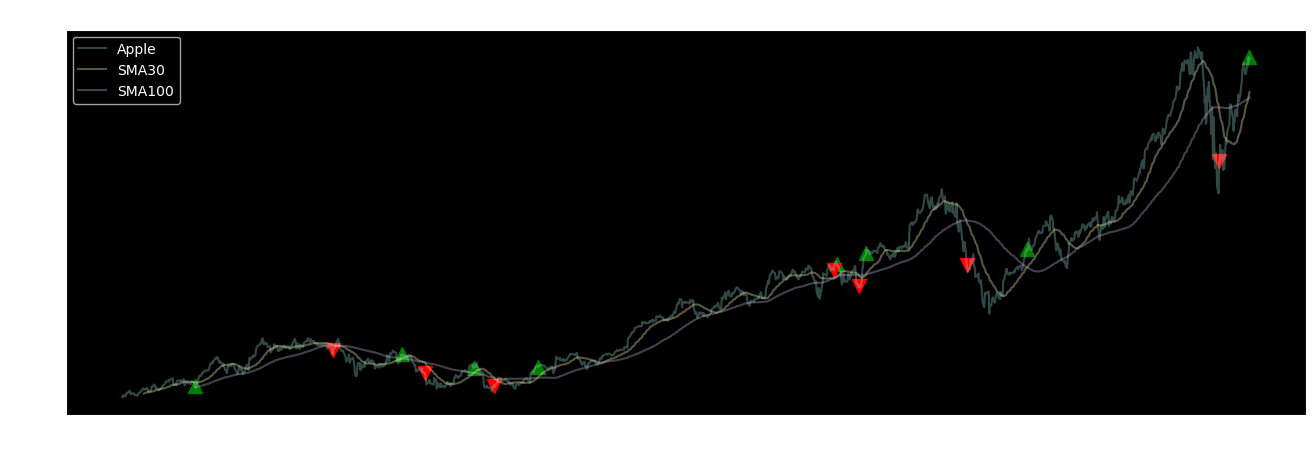

In [18]:
plt.figure(figsize = (16,5))
plt.style.use('dark_background')

plt.plot(stock["Date"], stock["Apple"],label = "Apple", alpha = 0.35)
plt.plot(stock["Date"], stock["SMA30"],label = "SMA30", alpha = 0.35)
plt.plot(stock["Date"], stock["SMA100"],label = "SMA100" , alpha = 0.35)

plt.scatter(stock["Date"],stock["Buy Price"],marker =  "^", color = "green", s = 100)
plt.scatter(stock["Date"],stock["Sell Price"],marker =  "v", color = "red", s = 100)

plt.title("Apple Historical Adj close Price")
plt.xlabel("From 27 May,2014 to 22 May, 2020")
plt.ylabel("Adj close Price")
plt.legend()
plt.show()

In [19]:
initial_capital = 10000
shares = 100  

In [20]:
portfolio = pd.DataFrame()

In [21]:
portfolio["Date"] = stock["Date"]
portfolio["Unit_price"] = stock["Apple"]
portfolio["No_Units"] = shares*stock["Hold"]
portfolio["Holding"] = shares*stock["Hold"].multiply(stock["Apple"])
portfolio["Cash"] = initial_capital - (shares*stock["Actions"].multiply(stock["Apple"])).cumsum()
portfolio["Total_Worth"] = portfolio["Holding"] + portfolio["Cash"]
portfolio["Returns"] = portfolio["Total_Worth"].pct_change()

In [22]:
portfolio

,Date,Unit_price,No_Units,Holding,Cash,Total_Worth,Returns
0,2014-05-27,80.948952,0,0.0000,10000.0000,10000.0000,NaN
1,2014-05-28,80.739334,0,0.0000,10000.0000,10000.0000,0.000000
2,2014-05-29,82.210480,0,0.0000,10000.0000,10000.0000,0.000000
3,2014-05-30,81.902557,0,0.0000,10000.0000,10000.0000,0.000000
4,2014-06-02,81.339699,0,0.0000,10000.0000,10000.0000,0.000000
5,2014-06-03,82.489952,0,0.0000,10000.0000,10000.0000,0.000000
6,2014-06-04,83.431915,0,0.0000,10000.0000,10000.0000,0.000000
7,2014-06-05,83.759270,0,0.0000,10000.0000,10000.0000,0.000000
8,2014-06-06,83.528938,0,0.0000,10000.0000,10000.0000,0.000000
9,2014-06-09,84.865509,0,0.0000,10000.0000,10000.0000,0.000000


In [23]:
(shares*stock["Actions"].multiply(stock["Apple"])).cumsum()

0           0.0000
1           0.0000
2           0.0000
3           0.0000
4           0.0000
5           0.0000
6           0.0000
7           0.0000
8           0.0000
9           0.0000
10          0.0000
11          0.0000
12          0.0000
13          0.0000
14          0.0000
15          0.0000
16          0.0000
17          0.0000
18          0.0000
19          0.0000
20          0.0000
21          0.0000
22          0.0000
23          0.0000
24          0.0000
25          0.0000
26          0.0000
27          0.0000
28          0.0000
29          0.0000
30          0.0000
31          0.0000
32          0.0000
33          0.0000
34          0.0000
35          0.0000
36          0.0000
37          0.0000
38          0.0000
39          0.0000
40          0.0000
41          0.0000
42          0.0000
43          0.0000
44          0.0000
45          0.0000
46          0.0000
47          0.0000
48          0.0000
49          0.0000
50          0.0000
51          0.0000
52          

In [26]:
Profit = 10000 -(-2483.3023)

In [27]:
Profit

12483.3023